## Business Problem:

### This dataset contains infromation of patient's survival data as they had undergone the surgery for the breast cancer at university of chicago's bilings hospital. Data was gathered during 1958 to 1970. 

### This dataset contains four columns or features including dependent variable such as:
#### 1) Age of the patient
#### 2) Year of patient's operation which is from 1958 to 1870 and in dataset it contains only last two digits i.e 58,60,68 etc.
#### 3) Number of how many positive axillary nodes detected
#### 4) patient's survival statuts: (1) 1 for patients who survived five or more years (2) 2 for patients who died with in five years
                               
## Objective:

### Objective of this problem is to find those features which are imporatant to define patient's survival status. So that in the future when we will get large amount of data we can use this analysis to identify and predict the patient's survivl status. 


## Exploratort Data Analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


### Let's import nesessary libraries for exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 


### Load the dataset and see the features 

In [3]:
df_h = pd.read_csv('haberman.csv')
df_h.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df_h.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df_h['status'].apply(str)
df_h[['age','year','nodes']] = df_h[['age','year','nodes']].astype(float)

In [7]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     306 non-null    float64
 1   year    306 non-null    float64
 2   nodes   306 non-null    float64
 3   status  306 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB


age       0
year      0
nodes     0
status    0
dtype: int64

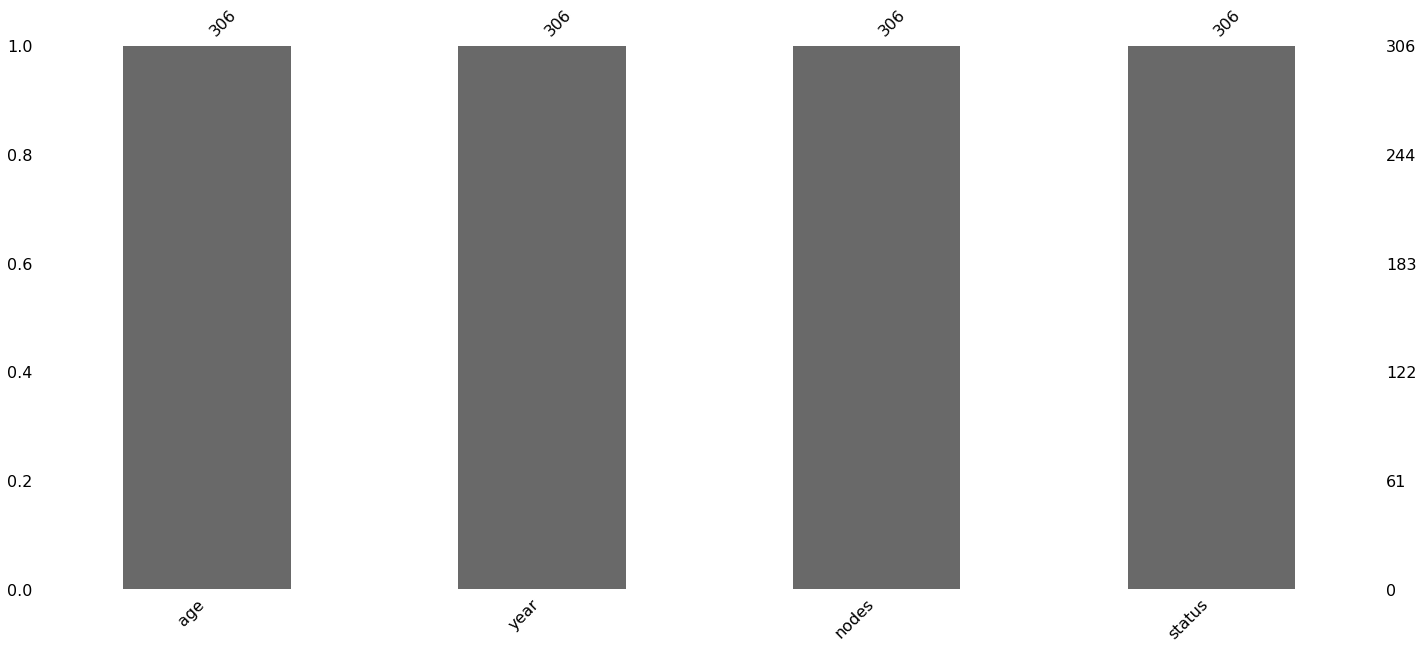

In [8]:
msno.bar(df_h)
df_h.isnull().sum()

### We can see that all four features have no null values (here I have used missingno package to see null values which is usefull if we have large dataset)

### Here we can see that all features are integer so that we have to convert 'status' into categorical feature since it is target variable and it has only two values 1 and 2. As we can see that we already converted into categorical feature. 

In [9]:
df_h.shape

(306, 4)

In [10]:
df_h.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
df_h['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [12]:
patient_survived_fiveyears_and_long = df_h.loc[df_h['status'] == 1]
patient_died_under_five_years = df_h.loc[df_h['status'] == 2]
print(patient_survived_fiveyears_and_long.shape, patient_died_under_five_years.shape)

(225, 4) (81, 4)


In [13]:
print(df_h.groupby('status').agg(['mean', 'median']))
print('*' * 65)
print('\nstandard deviation of each columns')
print(df_h.groupby('status').agg(np.std, ddof=1))


              age              year            nodes       
             mean median       mean median      mean median
status                                                     
1       52.017778   52.0  62.862222   63.0  2.791111    0.0
2       53.679012   53.0  62.827160   63.0  7.456790    4.0
*****************************************************************

standard deviation of each columns
              age      year     nodes
status                               
1       11.012154  3.222915  5.870318
2       10.167137  3.342118  9.185654


### We can see that basic statistics of numerical and categorical data and also we have class imbalance so that our dataset is imbalance dataset. We must convert imbalance datset into balance dataset before building any classification model.

### Here we can see some basic information about dataset

* Number of rows = 306
* Number of columns = 4 (including target variable)
* Number of classes = 2
* Data points for class 1 = 225
* Data points for class 2 = 81

* for class 1 mean value of nodes around 2.79 and 7.45 for class 2 
* for class 1 median value of nodes around 0 and 4 for class 2


### Here we can see the statistics of numerical fetaures such as:
 
##### Average age of every pateint is 52 and standard deviation is 10 so that range of patient's age is 42 to 62. While minimum age is 30 and maximum age is 83. 
##### Alomost all pateint had undergone for surgery in between year 1959 to 1965. However, one patient had his surgery in 1969. 
##### Avergae positive axillary nodes of each pateints are 4 while one patient had maximum positive axillary nodes which is 52 and we can consider as a outlier. 

## Univariate Analysis

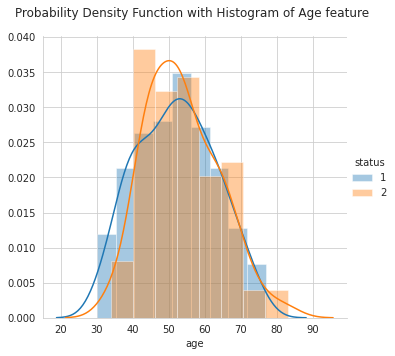

In [14]:
age = sns.set_style('whitegrid')
age = sns.FacetGrid(df_h, hue="status", size=5).map(sns.distplot, "age").add_legend();
plt.subplots_adjust(top=0.9)
age.fig.suptitle('Probability Density Function with Histogram of Age feature')
plt.show();

### We can see from the pdf graph that there is a overlap for both status 1 and status 2 as we cannot identify what age number is critical for which feature. In general, we can say that patients who has age in between 30 to 35 survived while age between 75 to 80 died under five years

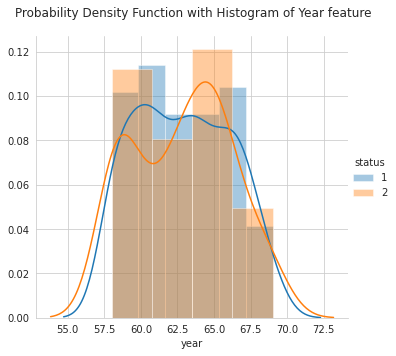

In [15]:
year = sns.set_style('whitegrid')
year = sns.FacetGrid(df_h, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.subplots_adjust(top=0.9)
year.fig.suptitle('Probability Density Function with Histogram of Year feature')
plt.show();

### There is almost overlap for both the status so we cannot say anything about year and we can also say that pateint's year is very less important features to decide survival status of pateints. 

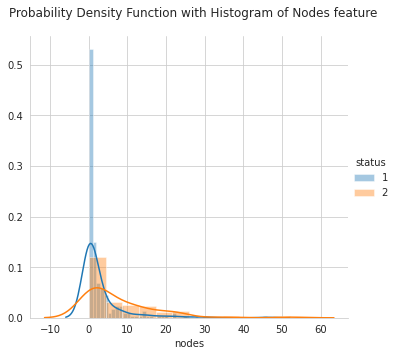

In [16]:
nodes = sns.set_style('whitegrid')
nodes = sns.FacetGrid(df_h, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.subplots_adjust(top=0.9)
nodes.fig.suptitle('Probability Density Function with Histogram of Nodes feature')
plt.show();

### Nodes featues seems like imporatnt featues amongs all features to decide survival status of pateints. As we can see that pateints who survived has positive axillary nodes in between 0 to 5 while there are some outlier in the dataset as distribution has right skewness. However, there are more number of nodes for pateints who did not survive. 

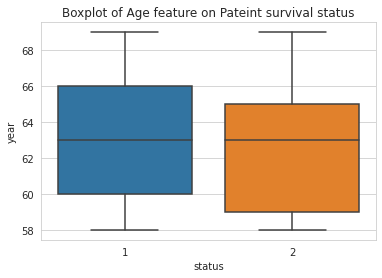

In [17]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='year', data=df_h).set_title('Boxplot of Age feature on Pateint survival status')
plt.show()

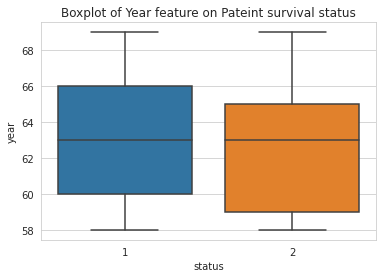

In [18]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='year', data=df_h).set_title('Boxplot of Year feature on Pateint survival status')
plt.show()

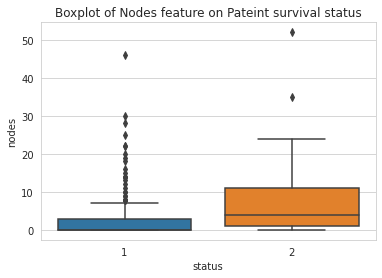

In [19]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='nodes', data=df_h).set_title('Boxplot of Nodes feature on Pateint survival status')
plt.show()

### Box plot is useful to find outlier and to see IQR range of feature in context of target variable. It can give more sence how class label is change as per feature's IQR range. 

### From the box plot graph, we can say that there is no much difference between status 1 and status 2 for age and year featues but for nodes we can see clearly that patients who survived had less number of nodes which is around 0 to 4 while pateints who died had more numbers of nodes whihc is around 3 to 12. 

### We can also see that age and year feature has no outlier while nodes featues has more outlier as specially for those pateints who survived as compare to those pateints who died. 

Text(0.5, 1.0, 'Violinplot of Age feature on Pateint survival status')

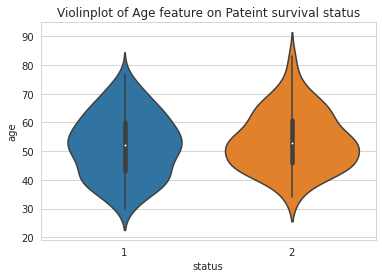

In [20]:
sns.set_style('whitegrid')
sns.violinplot(x='status', y='age', data=df_h).set_title('Violinplot of Age feature on Pateint survival status')


Text(0.5, 1.0, 'Violinplot of Year feature on Pateint survival status')

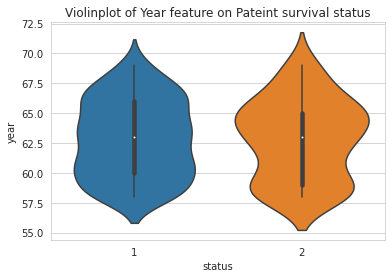

In [21]:
sns.set_style('whitegrid')
sns.violinplot(x='status', y='year', data=df_h).set_title('Violinplot of Year feature on Pateint survival status')

Text(0.5, 1.0, 'Violinplot of Nodes feature on Pateint survival status')

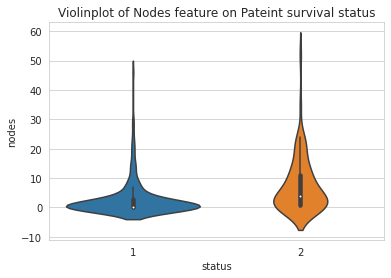

In [22]:
sns.set_style('whitegrid')
sns.violinplot(x='status', y='nodes', data=df_h).set_title('Violinplot of Nodes feature on Pateint survival status')

### Violin plot is useful if you want to see distribution and IQR range at the same time. Here we can see from the violin plot that there is not much difference for the year and age feature while in nodes feature we can say that majority positive nodes in a IQR range for those patients who survived. 

Text(0.5, 1.0, 'Cummulative density function plot of Age feature on Pateint survival status')

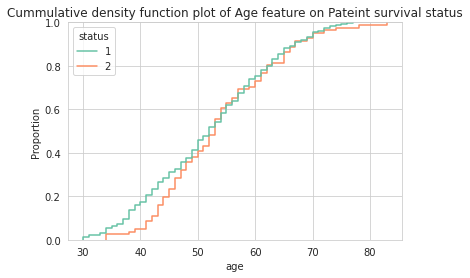

In [23]:
sns.ecdfplot(df_h, x="age", hue="status", palette="Set2").set_title('Cummulative density function plot of Age feature on Pateint survival status')

Text(0.5, 1.0, 'Cummulative density function plot of Year feature on Pateint survival status')

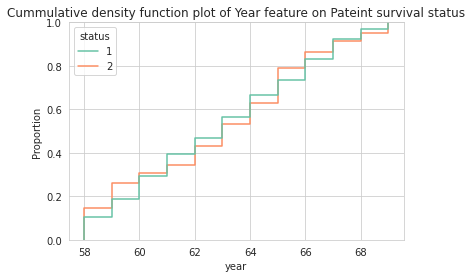

In [24]:
sns.ecdfplot(x='year', hue='status', data=df_h, palette="Set2").set_title('Cummulative density function plot of Year feature on Pateint survival status')

Text(0.5, 1.0, 'Cummulative density function plot of Nodes feature on Pateint survival status')

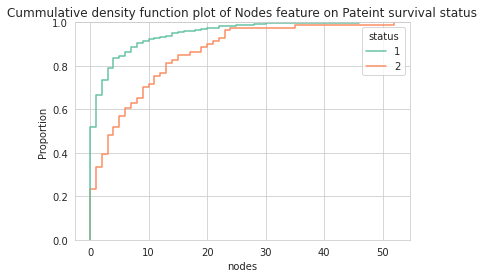

In [25]:
sns.ecdfplot(x='nodes', hue='status', data=df_h, palette="Set2").set_title('Cummulative density function plot of Nodes feature on Pateint survival status')

### Cummulative density function is useful to find actual probability for perticular fetaues in regaring of target variable. For example, we can say from the nodes cdf plot that 20 to 80 percent of patents have less than 4 number of positive nodes while 20 to 98 percemt of patients have 2 to 23 numbers of nodes. From the age cdf plot, we can say that 4o% of pateints who died under their age of 50. Aaprt form that cdf plot for year and age is almost overlap with survived pateints and non survived pateints.

### We can see that nodes feature is important to catogorise class 1 and class 2. 


* for class 1 mean value of nodes around 2.79 and 7.45 for class 2 
* for class 1 median value of nodes around 0 and 4 for class 2

We can see from plots that  distribution of age is quite gaussian distribution however distribution of year and nodes are not normal. 

We can see from box plot that only nodes feature has some outiliers so before building any model we have to remove it.

## Bivariate Analysis

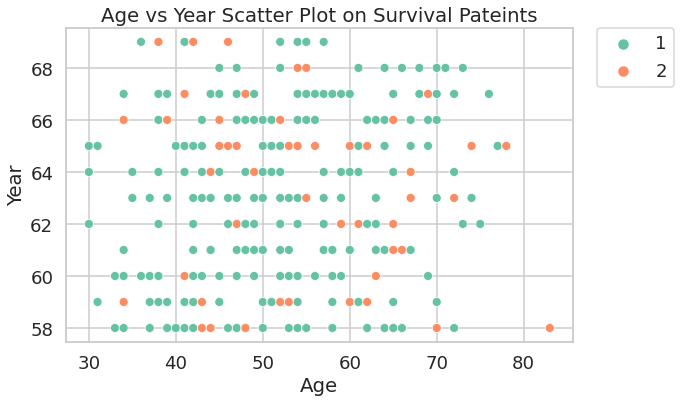

In [26]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="year", hue="status", data=df_h, palette="Set2")
plt.xlabel("Age")
plt.ylabel("Year")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Age vs Year Scatter Plot on Survival Pateints")
plt.tight_layout()

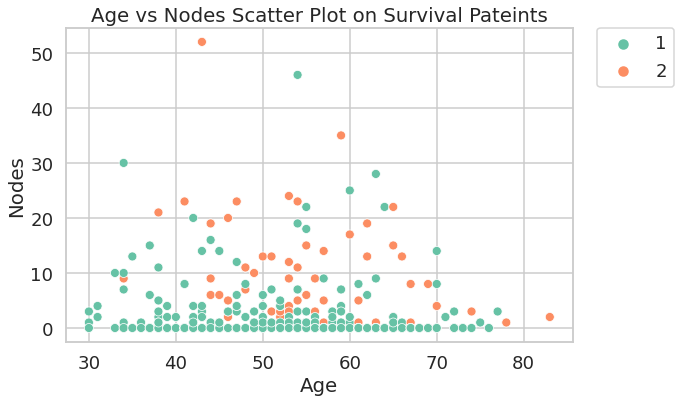

In [27]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="nodes", hue="status", data=df_h, palette="Set2")
plt.xlabel("Age")
plt.ylabel("Nodes")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Age vs Nodes Scatter Plot on Survival Pateints")
plt.tight_layout()

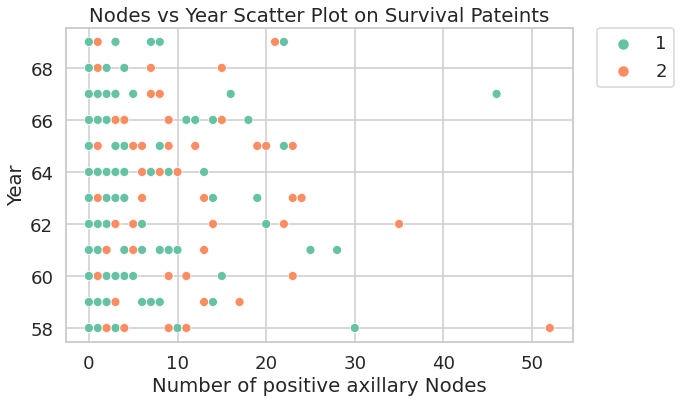

In [28]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="nodes", y="year", hue="status", data=df_h, palette="Set2")
plt.xlabel("Number of positive axillary Nodes")
plt.ylabel("Year")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Nodes vs Year Scatter Plot on Survival Pateints")
plt.tight_layout()

Text(0.5, 1.0, 'Pairplot of Heberman Dataset')

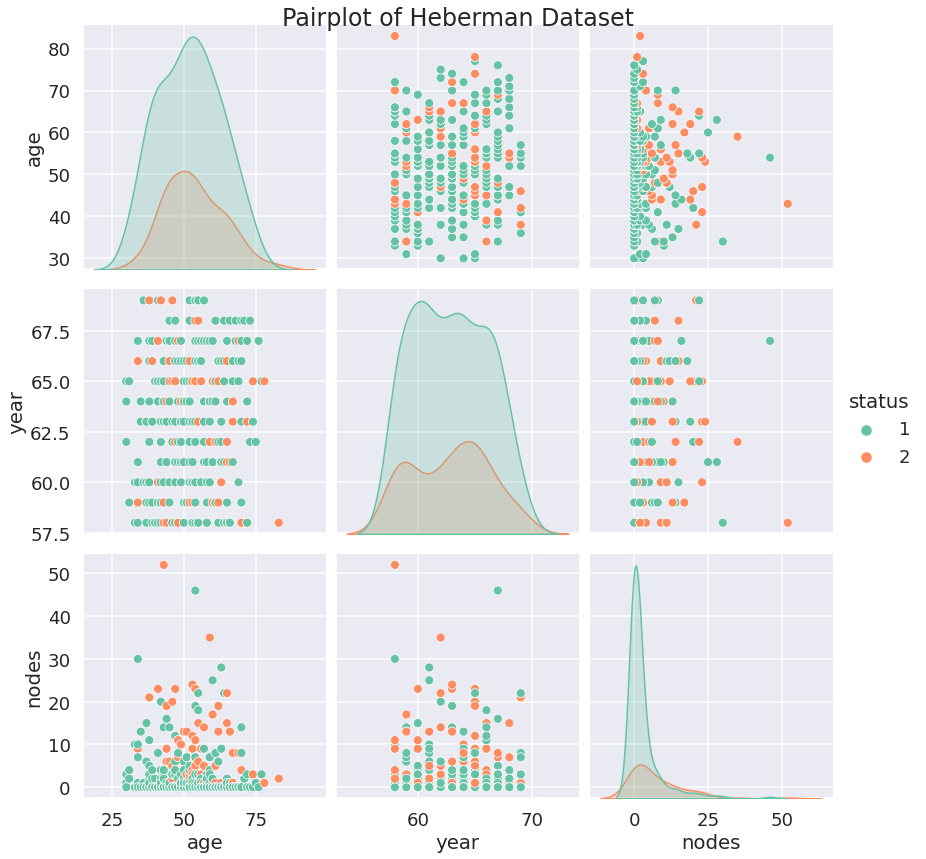

In [29]:
pairplot = sns.set_style('darkgrid')
pairplot = sns.pairplot(df_h, vars = df_h.iloc[:,0:3], hue='status', size=4, palette="Set2")
pairplot.fig.suptitle("Pairplot of Heberman Dataset", y=1.0)

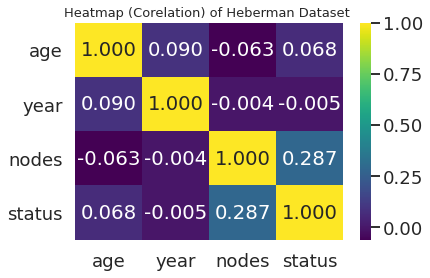

In [30]:
df_h.corr()
ax = plt.axes()
sns.heatmap(df_h.corr(), annot=True, cmap='viridis', fmt='0.3f', ax= ax)
ax.set_title('Heatmap (Corelation) of Heberman Dataset ', fontsize = 13)
plt.show()

### From the scatter plot, we can see that there is no corelation between age and year, year and nodes while for age and nodes we can see that most pateints have less nodes fpr differnet age group but not much we can say about age and nodes relation.

### As we can see from the scatter plot, pair plot also shows the same thing. 

### Here we can also see that there is no corelation between features

## Outlier Identify 

##### In statistics, outlier is the point which is far from other observations. So that before building any model we have to detect outliers and remove it so that it won't get affect out model performance.

#### Box plot and scatter plot also used to see how much outlier present in our dataset as we above above

#### We can also detect outlier with statistics function called z score

#### Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution

#### We re-scale and centralise the data when measuring the Z-score and search for data points that are too far from zero. The outliers would be viewed as those data points that are far too far from zero. A threshold of 3 or -3 is used in most situations, i.e. if the Z-score value is greater than or less than 3 or -3 respectively, the data point is marked as outliers. To detect the outliers, we will use the Z-score function described in the Scipy library.


In [31]:
from scipy import stats
import numpy as np
z_score_heberman = np.abs(stats.zscore(df_h)) 
print(z_score_heberman)

[[2.08214014 0.35358406 0.42159203 0.6       ]
 [2.08214014 0.26292148 0.14295885 0.6       ]
 [2.08214014 0.66183684 0.56090862 0.6       ]
 ...
 [2.2754471  0.66183684 0.14295885 0.6       ]
 [2.36816172 0.66183684 0.42159203 1.66666667]
 [2.83173483 1.49593258 0.28227544 1.66666667]]


### Looking the code and the output above, it is difficult to say which data point is an outlier. So we have to define a threshold to identify an outlier.

In [32]:
threshold = 3
print(np.where(z_score_heberman > 3))
print(np.count_nonzero(z_score_heberman > 3))

(array([  9,  62, 174, 215, 252]), array([2, 2, 2, 2, 2]))
5


### The first array contains the list of row numbers and second array respective column numbers, which mean z[9][2] have a Z-score higher than 3.

### We can say that we have five outlier values in nodes feature that we have to deal before model building.

In [33]:
z_score_heberman[9][2]

3.6185890507893874

### IQR -

#### Box plot uses the IQR method to show data and outliers (data shape), but we will need to use the mathematical formula and retrieve the outlier data to get a list of known outliers.

### Wikipedia Definition (https://en.wikipedia.org/wiki/Interquartile_range#Outliers)

#### The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

#### IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier. Here we find that box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR

#### Below, you can see IQR for each column.

In [34]:
Q1 = df_h.quantile(0.25)
Q3 = df_h.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age       16.75
year       5.75
nodes      4.00
status     1.00
dtype: float64


## Final Conclusion:

#### All in all, graphs, plots and statistics suggests that nodes feature is the most important variable to decide wherther pateints survived or died under five years. However, age is the second most important feature and year not at all usefull for deciced pateints survival status. 

## Recommendation:

#### Large number of data is vital for deciding survival status pateints so it is recommended to collect more data from different region as per statistcs because that way it will help to decide simple rule based model or predictive model on top of it.
